# Covariance and Covariance Matrix


## Covariance

$$
Cov(X,Y)=\frac{\sum(X_i-\bar{X})(Y_j-\bar{Y})}{n}
$$

$$
\rho(X,Y)=\frac{Cov(X,Y)}{\sigma_X \sigma_Y}
$$

### [Understand Covariance](https://stats.stackexchange.com/questions/18058/how-would-you-explain-covariance-to-someone-who-understands-only-the-mean)

- Each pair of points $(x_i,y_i)$, $(x_j,y_j)$ in that plot determines a `rectangle`: it's the smallest rectangle, whose sides are **parallel to the axes**, containing those points.

- **Draw all possible such rectangles**. Color them transparently, making the positive rectangles red (say) and the negative rectangles "anti-red" (blue). In this fashion, wherever rectangles overlap, their colors are either enhanced when they are the same (blue and blue or red and red) or cancel out when they are different.

  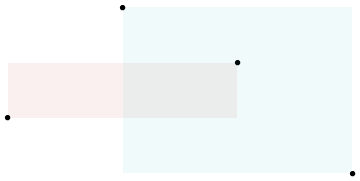

- **The covariance is the net amount of red in the plot** (treating blue as negative values).

- Here are some examples with 32 binormal points drawn from distributions with the given covariances, ordered from most negative (bluest) to most positive (reddest).

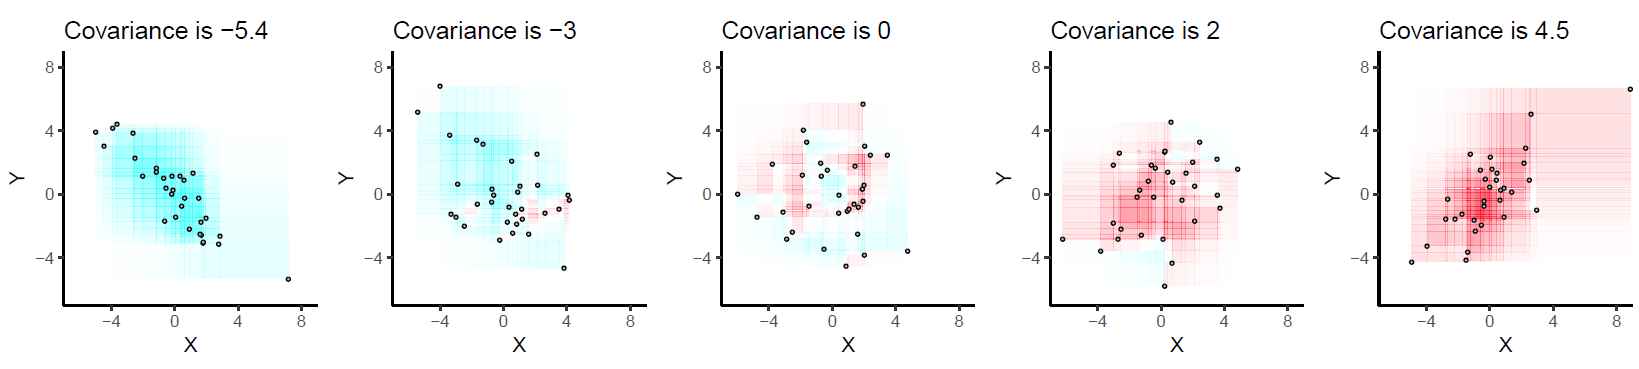


### Other Geometric Interpretation of Covariance

1. **Scatter Plot Representation**
   - If two variables are positively correlated, the points tend to lie along a line sloping upwards. This indicates that as one variable increases, the other tends to increase as well.
2. **Ellipse of Concentration**
   - If you draw an ellipse around the scatter plot such that it encloses most of the points, the major axis of the ellipse indicates the direction of the strongest correlation.
3. **Angle Between Variable Vectors** ($cos$ is as same as $\rho$)
   - Considering each variable as a vector in a high-dimensional space, where each observation is a component of the vector.
   - The cosine of the angle between these two vectors is proportional to their correlation. If the angle is acute (less than 90 degrees), the cosine is positive, reflecting a positive correlation. If the angle is obtuse (greater than 90 degrees), the cosine is negative, indicating a negative correlation.
4. **Vector Projection**
   - A longer projection length indicates a stronger relationship (either positive or negative), while a shorter length indicates a weaker relationship.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

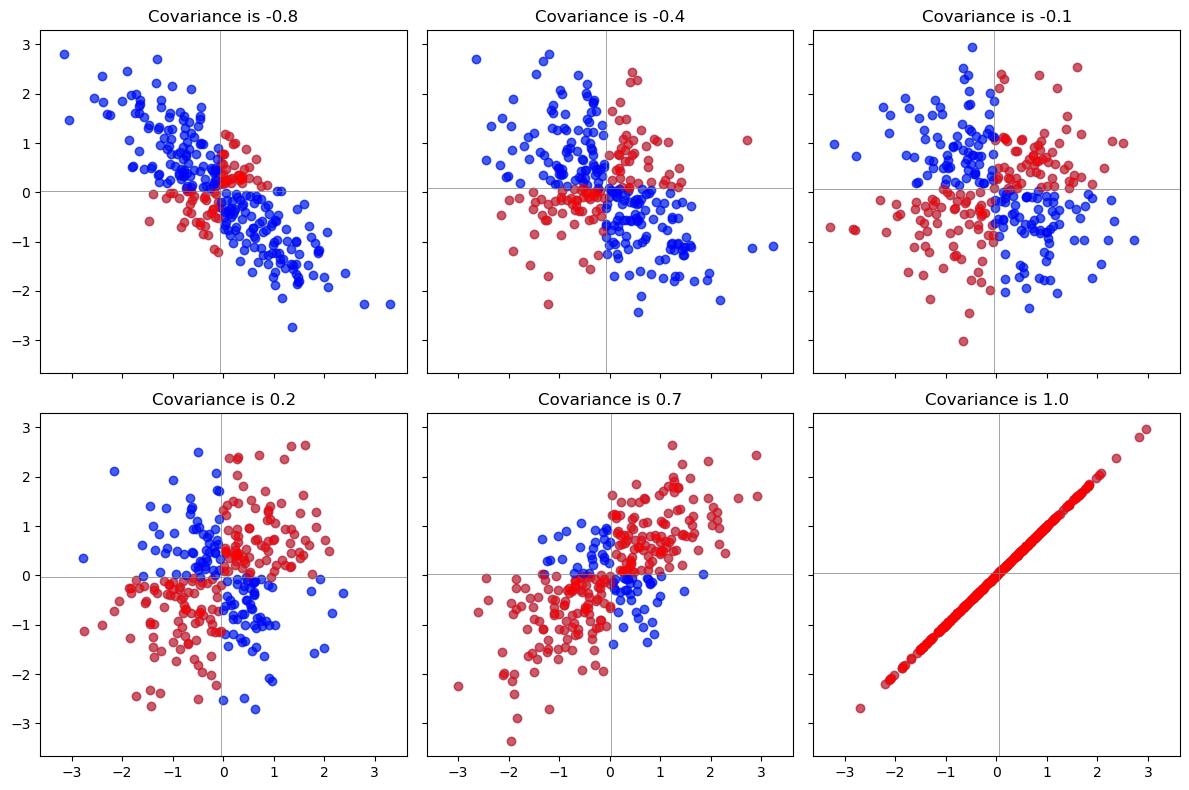

In [17]:
# Function to generate data with the specified covariance matrix
def generate_data_with_covariance(cov):
    mean = [0, 0]
    # Ensure the covariance matrix is positive semi-definite
    cov = np.array(cov)
    eigvals, _ = np.linalg.eigh(cov)
    if np.any(eigvals < 0):
        # Set any small negative eigenvalues to zero
        cov = cov + np.eye(cov.shape[0]) * (-np.min(eigvals) + 1e-10)
    data = np.random.multivariate_normal(mean, cov, size=300)
    return data[:, 0], data[:, 1]

# Function to plot the scatter plot with color-coded shading
def plot_scatter_with_shading(ax, x, y, title, color_positive, color_negative):
    # Calculate covariance
    cov = np.cov(x, y)[0, 1]

    # Scatter plot
    ax.scatter(x, y, alpha=0.5)

    # Shading logic
    for i in range(len(x)):
        if x[i] > np.mean(x) and y[i] > np.mean(y):
            ax.scatter(x[i], y[i], color=color_positive, alpha=0.5)
        elif x[i] < np.mean(x) and y[i] < np.mean(y):
            ax.scatter(x[i], y[i], color=color_positive, alpha=0.5)
        elif (x[i] > np.mean(x) and y[i] < np.mean(y)) or (x[i] < np.mean(x) and y[i] > np.mean(y)):
            ax.scatter(x[i], y[i], color=color_negative, alpha=0.5)
    
    # Titles and labels
    ax.set_title(f'{title} {cov:.1f}')
    ax.axhline(np.mean(y), color='grey', lw=0.5)
    ax.axvline(np.mean(x), color='grey', lw=0.5)

# Create figure and axes
fig, axs = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Covariance matrices for each subplot
cov_matrices = [
    [[1, -.8], [-.8, 1]],
    [[1, -.4], [-.4, 1]],
    [[1, 0], [0, 1]],
    [[1, .2], [.2, 1]],
    [[1, .7], [.7, 1]],
    [[1, 1], [1, 1]],  # Additional covariance matrix for the 6th plot
]

# Plot each scatter plot
for ax, cov in zip(axs, cov_matrices):
    x, y = generate_data_with_covariance(cov)
    plot_scatter_with_shading(ax, x, y, "Covariance is", 'red', 'blue')

# Adjust layout
plt.tight_layout()
plt.show()

### Properties of Covariance

1. **Bilinearity**: Because the amount of red depends on the **size of the plot**, covariance is directly proportional to the scale on the x-axis and to the scale on the y-axis. (**Not normalized by scale**)
2. **Correlation**. Covariance increases as the points approximate an upward sloping line and decreases as the points approximate a downward sloping line.
3. **Sensitivity to outliers**. A geometric outlier (one point standing away from the mass) will create many large rectangles in association with all the other points.


## Covariance Matrix

A covariance matrix is a mathematical concept that captures the variance of each variable and the covariance between variables in a dataset.

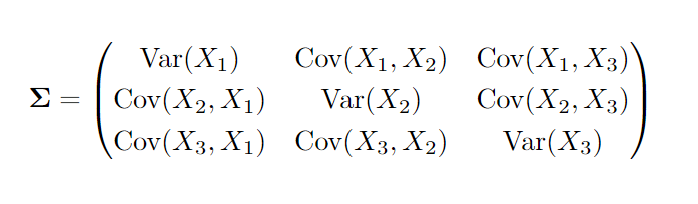

### Importance in Statistical Analysis

1. **Measure of Correlation**: The covariance matrix is essential for understanding the linear relationship between variables.
2. **Multivariate Normal Distribution**: In the context of multivariate normal distributions, the covariance matrix characterizes the shape, orientation, and scale of the distribution.
3. **Dimensionality Reduction**: Covariance matrices are used in `principal component analysis (PCA)` and `factor analysis`, which are techniques for dimensionality reduction and feature extraction.


### Example of PCA


In [21]:
from sklearn.decomposition import PCA

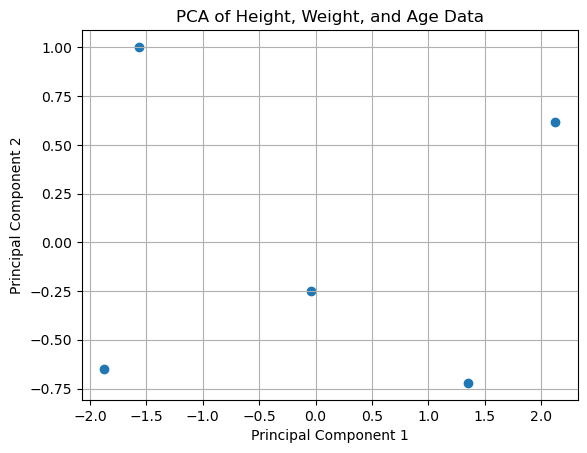

Variance explained by each component: [0.820137   0.15933251]


In [22]:
# Example dataset with height (cm), weight (kg), and age (years)
data = np.array([
    [180, 80, 30],
    [174, 72, 28],
    [168, 60, 26],
    [181, 70, 32],
    [172, 68, 24],
    # Add more data as needed
])

# Standardize the data
data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Create a PCA instance and fit the standardized data
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca.fit(data_standardized)

# Transform the data
transformed_data = pca.transform(data_standardized)

# Plot the first two principal components
plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Height, Weight, and Age Data')
plt.grid(True)
plt.show()

# Print the variance explained by each component
print("Variance explained by each component:", pca.explained_variance_ratio_)